# Heart Disease Prediction

About
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.


Attribute Information:

> 1.age = age in years

> 2.sex= (1 = male; 0 = female)

> 3.cp = chest pain type

> 4.trestbpsr = esting blood pressure (in mm Hg on admission to the hospital)

> 5.chol = serum cholestoral in mg/dl

> 6.fbs = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

> 7.restecg = resting electrocardiographic results

> 8.thalach = maximum heart rate achieved

> 9.exang = exercise induced angina (1 = yes; 0 = no)

> 10.oldpeak = ST depression induced by exercise relative to rest

> 11.slope = the slope of the peak exercise ST segment

> 12.ca = number of major vessels (0-3) colored by flourosopy

> 13.thal = 3 = normal; 6 = fixed defect; 7 = reversable defect

> 14.target = 1 or 0

# Libraris and data import

In [182]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# this helps to show the output of every line of code
# values are all and last_expr
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

In [183]:
# read the file
df = pd.read_csv('data.csv')

# Data information

In [184]:
# read the first five rows of data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [185]:
# to check the type
type(df)

pandas.core.frame.DataFrame

In [186]:
# to check the dimension
df.shape

(303, 14)

In [187]:
#gerneral information  about data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [188]:
# statical information about the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Missing value analysis

In [189]:
print(df.isna().sum())
# from output we can see there is no na values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# Data analysis and visualization

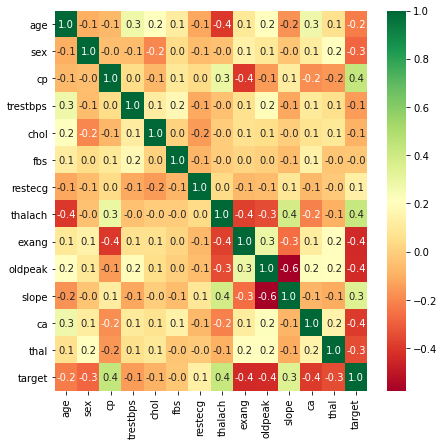

In [190]:
# figure plot the of the size 10 by 10
# it gives the value of correlation betweeen the independent variables
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, fmt='.1f',cmap = 'RdYlGn')
plt.show()
# from the heatmap of correlation we can see  there is very less correlation among varibles

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000127FA709BC8>,
      dtype=object)

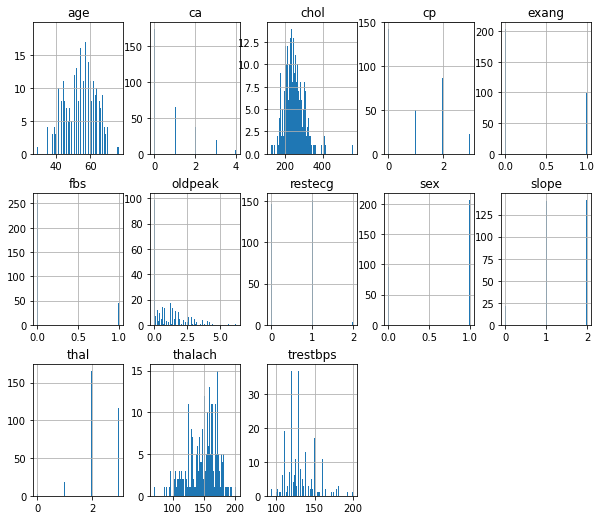

In [191]:
# Histogram of variables
columns = list(df)[0:-1]
df[columns].hist(stacked = False, bins = 100, figsize = (10, 15), layout = (5,5))
# from the graph only histogram of 5 varibale are good to analyze

In [192]:
#age analysis
# count the number of  ages of first 15 group
df.age.value_counts()[:15]
# df['age'].value_counts()[:15]
# above both gives the same value

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
Name: age, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

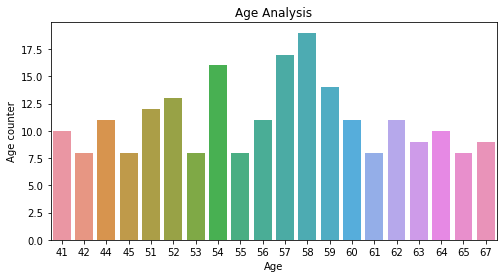

In [193]:
# draw a barplot showing age value count
plt.figure(figsize=(8,4)) 
sns.barplot(x= df.age.value_counts()[:20].index, y= df.age.value_counts()[:20].values  )
plt.xlabel('Age')
plt.ylabel("Age counter")
plt.title("Age Analysis")
plt.show

In [194]:
# target value analysis
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [195]:
# finding percentage of patient having and not having heart diseases
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of patients dont have heart disease: {:.2f}%".format((countNoDisease/(len(df.target)))*100))
print("Percentage of patients have heart disease: {:.2f}%".format((countHaveDisease/(len(df.target)))*100))

Percentage of patients dont have heart disease: 45.54%
Percentage of patients have heart disease: 54.46%


In [196]:
# femal and male percentage
# after comparing sex == 0 it must return the data frame so there is df
countFemale= len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("% of Female Patients: {:.2f}%".format((countFemale/(len(df.sex))*100)))
print("% of male Patients: {:.2f}%".format((countMale/(len(df.sex))*100)))

% of Female Patients: 31.68%
% of male Patients: 68.32%


In [197]:
# finding the count of young, middle and elderly age people
# young_ages = [(df.age>=29)&(df.age<40)] this only return true and false for all data
young_ages = [(df.age>=29)&(df.age<40)] # this gives the whole data frame of that age group
middle_ages = df[(df.age>=40)&(df.age<55)]
elderly_ages = df[(df.age>=55)]
print("young ages", len(young_ages))
print("middle ages", len(middle_ages))
print("elderly ages", len(elderly_ages))

young ages 1
middle ages 128
elderly ages 159


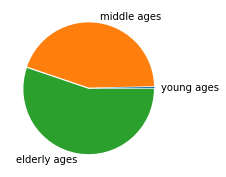

In [198]:
# pie chart for young middle and elderly age
# the gap in the figure is shown by explode
colors = ['blue','green', 'red']
explode= (.01,.01,.01)
plt.figure(figsize= (3,3))
plt.pie([len(young_ages), len(middle_ages), len(elderly_ages)],explode = explode, labels=['young ages', 'middle ages', 'elderly ages'])
plt.show()

In [199]:
#chest pain analysis
# count the different values for chest pain
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [200]:
# this gives the unique values for target variable
df.target.unique()

array([1, 0], dtype=int64)

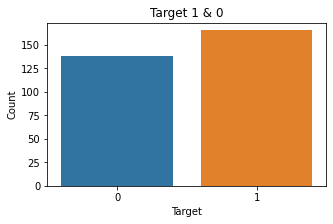

In [201]:
# bar plot for target count
plt.figure(figsize= (5,3))
sns.countplot(df.target)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target 1 & 0')
plt.show()

# Model Building

In [202]:
# make  x and y data
x_data = df.drop(['target'], axis = 1) # axis= 1 is for column data
x_data.head()
y = df.target.values
print(y[0:5,]) # print five rows values

[1 1 1 1 1]


In [203]:
# make train and text sets
import sklearn as sk
print(sk.__version__)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.2, random_state= 0)

0.22


In [204]:
type(x_train)

pandas.core.frame.DataFrame

In [205]:
# this is feature scaling
# this is standerization that means divided by standard deviation
# one is fit_transfrom which apply the change
# another is transform which transform but not apply to last for later puroposes
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Logistic regression

In [206]:
# doing logistic regression
# there is no change in accurecy after and before transformation
# that means logistic regression does the transformation by default
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(y_pred)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [207]:
# confusion matrix or contigency table
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[21  6]
 [ 3 31]]


In [208]:
# find accurecy of test
# accurecy is (tp+tn)/(all)
# precision=positive predictive value(ppv)= tp/(tp+fp)
# recall = sensitivity = tp/(tp+fn)

print(accuracy_score(y_test, y_pred)*100)
print(lr.score(x_test, y_test)*100)

print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

85.24590163934425
85.24590163934425
Precision: 0.8378378378378378
Recall: 0.9117647058823529


In [209]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [210]:
# doing cross validation for logistic regression
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
# here actually cross validation reduce the accuracy of our model

Accuracy: 81.45 %
Standard Deviation: 6.87 %


In [211]:
# Logistic Regression Test Accuracy 85.25%

## K-nearast neighbor

In [212]:
#KNN model
# befor transformation it was only 63 and after feature scaling it's value is 83.61 percent
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
print("KNN accuracy: {:.2f}%".format(knn.score(x_test, y_test)*100))

KNN accuracy: 83.61%


## Support vector machine

In [213]:
# support vector machine
# before feature scaling it was only 56.5% but after it is 86.89
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
print("SVC accuracy: {:.2f}%".format(svm.score(x_test, y_test)*100))

SVC accuracy: 86.89%


In [214]:
from sklearn.metrics import classification_report
y_pred = svm.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.84      0.94      0.89        34

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



In [215]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
# here also the accuracy decrease

Accuracy: 81.43 %
Standard Deviation: 6.13 %


## Naive Bayes

In [216]:
# Naive Bayes 
# same acuracy before and after transformation
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("NB accuracy: {:.2f}%".format(nb.score(x_test, y_test)*100))

NB accuracy: 85.25%


## Random forest

In [217]:
# Random forset
# same bfore and after feature scaling
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state= 1)
rf.fit(x_train, y_train)
print("Random Forest accuracy: {:.2f}%".format(rf.score(x_test, y_test)*100))

Random Forest accuracy: 85.25%


## Xgboost

In [218]:
# XG boost
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xg = xgb.XGBClassifier()
xg.fit(x_train, y_train)
print(" XG boost: {: .2f}%".format(xg.score(x_test, y_test)*100))

 XG boost:  78.69%


In [219]:
# accuracy is 78.69 %

In [220]:
# here support vector machine has better accurecy about 86.89%

In [221]:
# note that every step done with logistic regression can be done with other too.(contengency table analysis)